This project will leverage machine learning models to forecast future values of both CPI and unemployment rate using historical economic data.

Data Set Description

The dataset contains 787 rows and 23 columns, with no missing values. It appears to focus on economic and financial indicators, potentially to study their relationship with recessions. Here's an overview:

Key Features:
Dates: The time period of the data, stored as strings.
Payrolls-related Columns:
Indicate changes in payrolls over various time periods (e.g., 3-mont
annualized, 12-month).
Unemployment Rate:
Includes the rate itself and 12-month changes.
Real Fed Funds Rate:
Represents the adjusted interest rate and its changes over 12 months.
CPI (Consumer Price Index):
Tracks inflation via 3-month annualized and 12-month percentage changes.
Treasury Spreads:
Yield spreads, including the 3-month vs. 10-year and 5-year vs. 10-year spreads, with changes over time.
S&P 500 Metrics:
Tracks 3-month and 12-month percentage changes in the S&P 500 index.
IPI (Industrial Production Index):
Indicates industrial output changes over different periods.
Recession:
A binary indicator (0/1) showing whether a recession occurred.





1. Exploratory Data Analysis (EDA): Examine trends, correlations, and distributions.
2. Feature Engineering: Create lag features (e.g., past 3-month averages) to capture temporal effects.
** Temporal effects- occur on timescales ranging from milliseconds (response time) to years
3. Modeling:
Starting  with simple models (Logistic Regression) for interpretability.
Progress to complex models (Random Forest, XGBoost) for better performance.
4.Feature Importance Visualization: Use tools like SHAP or permutation importance to explain the model's decisions.

In [ ]:
import pandas as pd

# Load the uploaded dataset to examine its structure and contents
file_path = 'recession.csv'
data = pd.read_csv(file_path)

# Display the first few rows and general information about the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dates                            787 non-null    object 
 1   Payrolls_3mo_pct_chg_annualized  787 non-null    float64
 2   Payrolls_12mo_pct_chg            787 non-null    float64
 3   Payrolls_3mo_vs_12mo             787 non-null    float64
 4   Unemployment_Rate                787 non-null    float64
 5   Unemployment_Rate_12mo_chg       787 non-null    float64
 6   Real_Fed_Funds_Rate              787 non-null    float64
 7   Real_Fed_Funds_Rate_12mo_chg     787 non-null    float64
 8   CPI_3mo_pct_chg_annualized       787 non-null    float64
 9   CPI_12mo_pct_chg                 787 non-null    float64
 10  CPI_3mo_vs_12mo                  787 non-null    float64
 11  10Y_Treasury_Rate_12mo_chg       787 non-null    float64
 12  3M_Treasury_Rate_12mo_

(None,
         Dates  Payrolls_3mo_pct_chg_annualized  Payrolls_12mo_pct_chg  \
 0  01-02-2021                         0.002415              -0.063081   
 1  01-01-2021                         0.020370              -0.061460   
 2  01-12-2020                         0.047879              -0.058969   
 3  01-11-2020                         0.088152              -0.059258   
 4  01-10-2020                         0.122018              -0.062539   
 
    Payrolls_3mo_vs_12mo  Unemployment_Rate  Unemployment_Rate_12mo_chg  \
 0              0.065496                6.3                         2.8   
 1              0.081831                6.7                         3.1   
 2              0.106848                6.7                         3.1   
 3              0.147410                6.9                         3.3   
 4              0.184558                7.8                         4.3   
 
    Real_Fed_Funds_Rate  Real_Fed_Funds_Rate_12mo_chg  \
 0            -1.210140               

In [ ]:
# Assign the DataFrame to df
df = pd.read_csv(file_path)  # Assigning to df instead of data

In [ ]:

# Check for missing values
print(df.isnull().sum())  # Now df is defined

Dates                              0
Payrolls_3mo_pct_chg_annualized    0
Payrolls_12mo_pct_chg              0
Payrolls_3mo_vs_12mo               0
Unemployment_Rate                  0
Unemployment_Rate_12mo_chg         0
Real_Fed_Funds_Rate                0
Real_Fed_Funds_Rate_12mo_chg       0
CPI_3mo_pct_chg_annualized         0
CPI_12mo_pct_chg                   0
CPI_3mo_vs_12mo                    0
10Y_Treasury_Rate_12mo_chg         0
3M_Treasury_Rate_12mo_chg          0
3M_10Y_Treasury_Spread             0
3M_10Y_Treasury_Spread_12mo_chg    0
5Y_10Y_Treasury_Spread             0
S&P_500_3mo_chg                    0
S&P_500_12mo_chg                   0
S&P_500_3mo_vs_12mo                0
IPI_3mo_pct_chg_annualized         0
IPI_12mo_pct_chg                   0
IPI_3mo_vs_12mo                    0
Recession                          0
dtype: int64


<ipython-input-43-6540184904d7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Recession', data=df, palette="coolwarm")


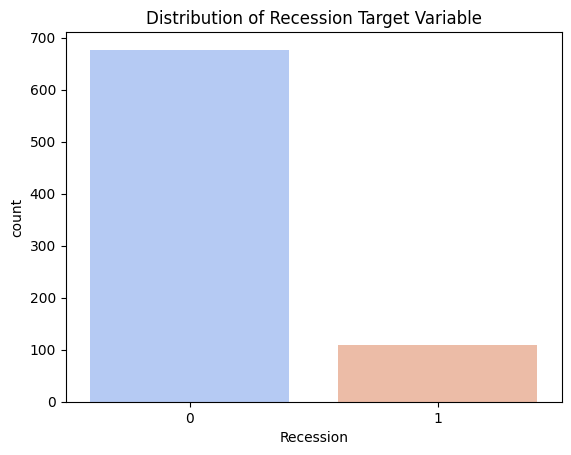

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Assuming df is already defined and loaded with data:

# Target variable distribution
sns.countplot(x='Recession', data=df, palette="coolwarm")
plt.title("Distribution of Recession Target Variable")
plt.show()

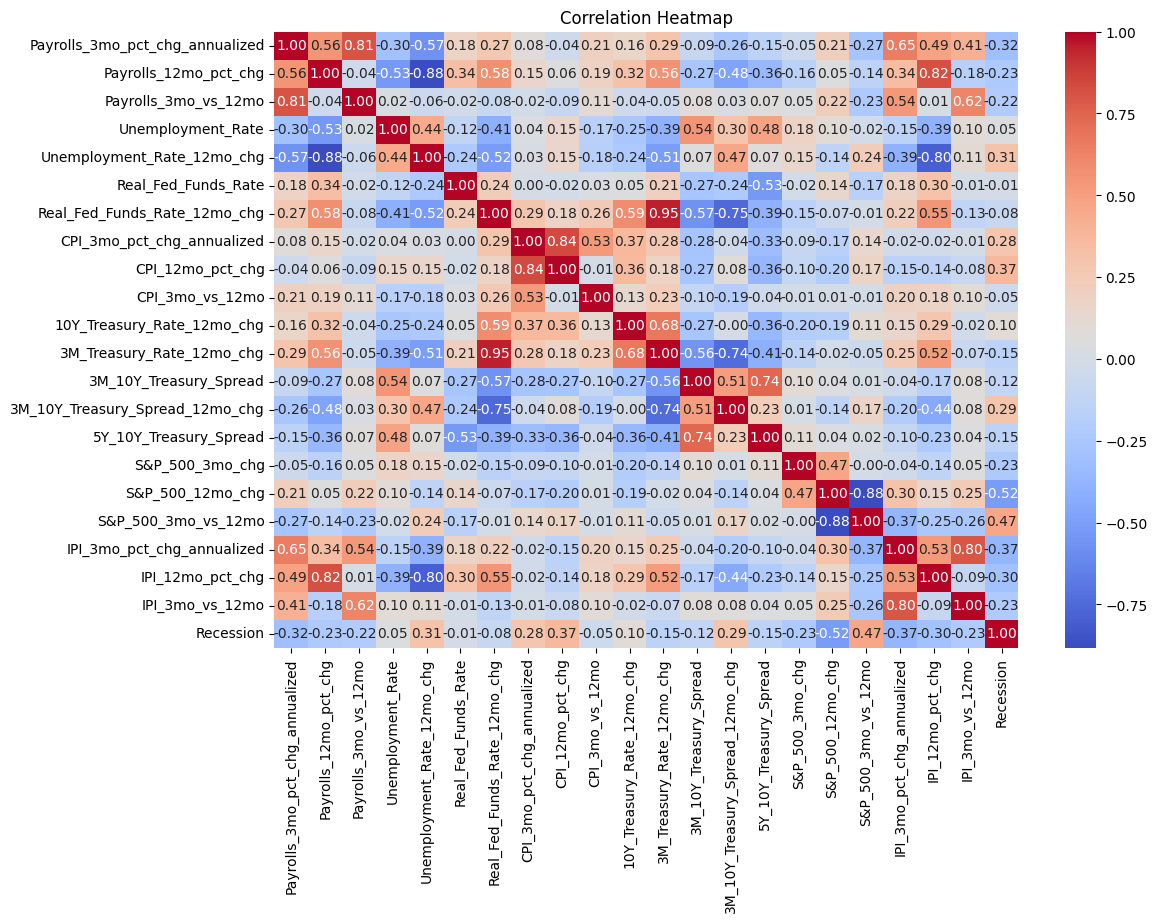

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
# Calculate correlation only for numeric columns
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Selecting the most important features and ploting relationshi

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap to examine relationships among key columns
plt.figure(figsize=(14, 10))
correlation_matrix = merged_df[['UNRATE', 'CPIAUCSL', 'Recession', 'Unemployment_Rate', 'CPI_3mo_pct_chg_annualized', 'CPI_12mo_pct_chg']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Unemployment Rate, CPI, and Recession Indicators")
plt.show()
'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already defined and loaded with data:

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Instead of important_correlation_matrix, use correlation_matrix or
# Filter correlation_matrix to include only the important features and assign it to important_correlation_matrix
# For example, if 'feature1', 'feature2' are important features:
# important_correlation_matrix = correlation_matrix[['feature1', 'feature2']].loc[['feature1', 'feature2']]

# Plot the heatmap with only the important features or the complete correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")  # Changed to correlation_matrix
plt.title("Correlation Heatmap (Important Features)")
plt.show()

SyntaxError: incomplete input (<ipython-input-4-d911c732f9e9>, line 10)

In [ ]:
# Load the datasets
unemployment_path = 'UNRATE.csv'
cpi_path = 'CPIAUCSL.csv'

In [ ]:
# Reading the datasets
unrate_df = pd.read_csv(unemployment_path)
cpi_df = pd.read_csv(cpi_path)

# Checking the first few rows of each dataset
unrate_head = unrate_df.head()
cpi_head = cpi_df.head()

# Checking basic info for each dataset
unrate_info = unrate_df.info()
cpi_info = cpi_df.info()

unrate_head, cpi_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    922 non-null    object 
 1   UNRATE  922 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933 entries, 0 to 932
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      933 non-null    object 
 1   CPIAUCSL  933 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.7+ KB


(         DATE  UNRATE
 0  1948-01-01     3.4
 1  1948-02-01     3.8
 2  1948-03-01     4.0
 3  1948-04-01     3.9
 4  1948-05-01     3.5,
          DATE  CPIAUCSL
 0  1947-01-01     21.48
 1  1947-02-01     21.62
 2  1947-03-01     22.00
 3  1947-04-01     22.00
 4  1947-05-01     21.95)

In [ ]:

# 1. Merge the dataframes using 'DATE' as the key
merged_df = pd.merge(unrate_df, cpi_df, on='DATE', how='inner')

# 2. Ensure the 'DATE' column exists and is properly named in merged_df:
print(merged_df.columns)  # Check for the presence and casing of 'DATE'



Index(['DATE', 'UNRATE', 'CPIAUCSL'], dtype='object')


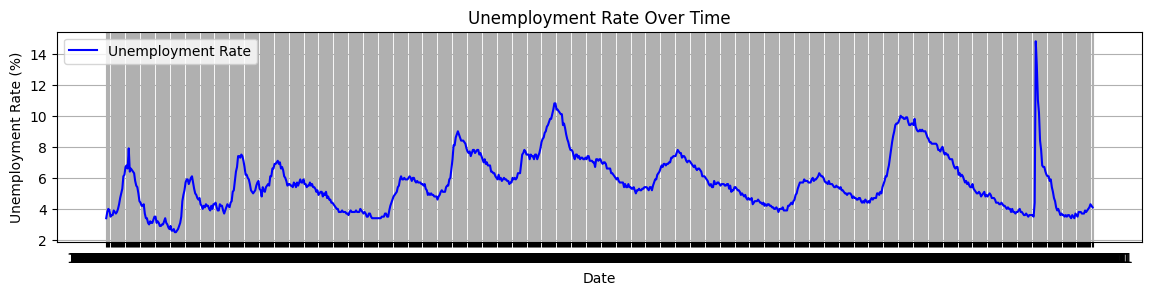

In [ ]:
# Plotting trends for UNRATE and CPIAUCSL
plt.figure(figsize=(14, 6))

# Plot UNRATE
plt.subplot(2, 1, 1)
plt.plot(merged_df['DATE'], merged_df['UNRATE'], label='Unemployment Rate', color='blue')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.legend()

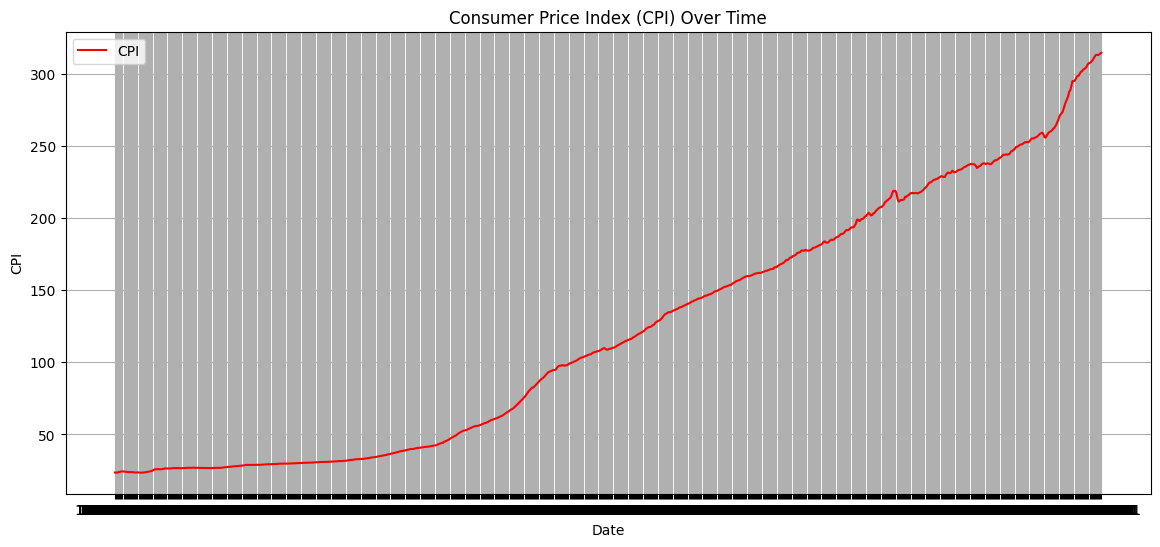

In [ ]:

# Assuming df is already defined and loaded with data:

# Plotting CPI over time
plt.figure(figsize=(14, 6))
plt.plot(merged_df['DATE'], merged_df['CPIAUCSL'], label='CPI', color='red')
plt.title('Consumer Price Index (CPI) Over Time')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
recession_df = pd.read_csv('recession.csv')
cpi_df = pd.read_csv('CPIAUCSL.csv')
unemployment_df = pd.read_csv('UNRATE.csv')

# Rename the 'Dates' column in recession_df to 'DATE' to match with other DataFrames
recession_df = recession_df.rename(columns={'Dates': 'DATE'})  # Rename 'Dates' to 'DATE'

# Merge the datasets based on the date (now using 'DATE' column in all datasets)
merged_df = pd.merge(recession_df, cpi_df, on='DATE', how='left')
merged_df = pd.merge(merged_df, unemployment_df, on='DATE', how='left')

# Check for missing values after merge:
print(merged_df[['DATE', 'CPIAUCSL', 'UNRATE', 'Recession']].isnull().sum())

# Optional: Drop rows with missing CPI or UNRATE values before plotting:
merged_df = merged_df.dropna(subset=['CPIAUCSL', 'UNRATE'])

# ... (Rest of your plotting code)

DATE           0
CPIAUCSL     787
UNRATE       787
Recession      0
dtype: int64


In [ ]:
# Convert 'Dates' to datetime
df['Dates'] = pd.to_datetime(df['Dates'])
df.set_index('Dates', inplace=True)


Lag features are created to incorporate information about past values of a time series into the model's prediction process. By including lagged values as features, we are essentially telling the model to consider the historical behavior of these variables when making predictions about the future.

In [ ]:
# Create lag features (e.g., unemployment rate lagged by 1 month)
'''shift(1) creates a new column where the values are shifted down by one row. This effectively means that the value for a given date in the new lagged column represents the value from the previous date (i.e., one month prior).
Unemployment_Rate_Lag1 now contains the unemployment rate from the previous month.
CPI_3mo_pct_chg_Lag1 now contains the CPI 3-month percentage change from the previous month.'''

df['Unemployment_Rate_Lag1'] = df['Unemployment_Rate'].shift(1)
df['CPI_3mo_pct_chg_Lag1'] = df['CPI_3mo_pct_chg_annualized'].shift(1)

# Drop rows with NaN values after lag creation
df.dropna(inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
features_to_scale = [
    'Unemployment_Rate', 'Unemployment_Rate_Lag1',
    'CPI_3mo_pct_chg_annualized', 'CPI_3mo_pct_chg_Lag1',
    '3M_10Y_Treasury_Spread', 'Payrolls_3mo_pct_chg_annualized'
]

scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


In [ ]:


# Create lag features
df['Unemployment_Rate_Lag1'] = df['Unemployment_Rate'].shift(1)  # Lag of 1 period
df['CPI_3mo_pct_chg_Lag1'] = df['CPI_3mo_pct_chg_annualized'].shift(1)  # Lag of 1 period

# ... (Your feature selection code) ...

features = [
    'Unemployment_Rate', 'Unemployment_Rate_Lag1',
    'CPI_3mo_pct_chg_annualized', 'CPI_3mo_pct_chg_Lag1',
    '3M_10Y_Treasury_Spread', 'Payrolls_3mo_pct_chg_annualized'
]

# Check if all features are present in the DataFrame (optional, but recommended)
missing_features = [f for f in features if f not in df.columns]
if missing_features:
    print(f"Warning: The following features are still missing: {missing_features}")
else:
    X = df[features]
    y = df['Recession']

In [ ]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
# Make sure these columns exist in your dataframe (df) with the exact same names
features_to_scale = [
    'Unemployment_Rate',
    'CPI_3mo_pct_chg_annualized',
    '3M_10Y_Treasury_Spread',
    'Payrolls_3mo_pct_chg_annualized'
    # Removed 'Unemployment_Rate_Lag1' and 'CPI_3mo_pct_chg_Lag1' as they are not in the dataframe
]

scaler = StandardScaler()
# Check if columns are present in the DataFrame before scaling
for col in features_to_scale:
    if col not in df.columns:
        print(f"Warning: Column '{col}' not found in DataFrame. Skipping.")
    else:
        df[col] = scaler.fit_transform(df[[col]]) # Scale each column individually

# Alternatively, if you intended to scale all numeric columns, you could use:
# numeric_features = df.select_dtypes(include=['number']).columns
# df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [ ]:
# Selecting features based on domain knowledge
features = [
    'Unemployment_Rate', 'Unemployment_Rate_Lag1',
    'CPI_3mo_pct_chg_annualized', 'CPI_3mo_pct_chg_Lag1',
    '3M_10Y_Treasury_Spread', 'Payrolls_3mo_pct_chg_annualized'
]

# Check if all features are present in the DataFrame
missing_features = [f for f in features if f not in df.columns]

if missing_features:
    print(f"Warning: The following features are missing from the DataFrame: {missing_features}")
    # Either remove the missing features from the list or create/calculate them
    # Example: Removing missing features
    features = [f for f in features if f in df.columns]
    # Proceed with feature selection
    X = df[features]
    y = df['Recession']
else:
    # All features are present, proceed as usual
    X = df[features]
    y = df['Recession']

In [ ]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split  # Import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Import the necessary class
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       136
           1       0.94      0.73      0.82        22

    accuracy                           0.96       158
   macro avg       0.95      0.86      0.90       158
weighted avg       0.96      0.96      0.95       158



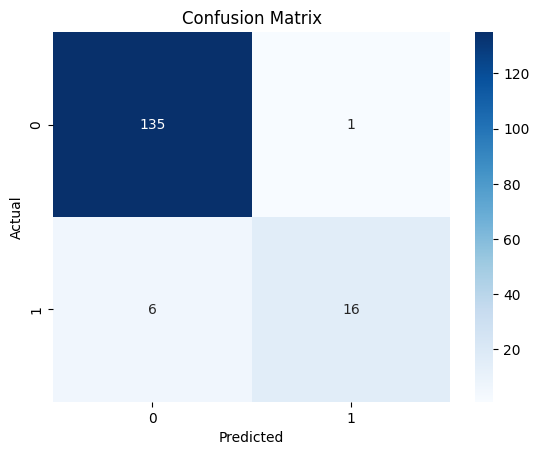

Accuracy: 0.96
F1 Score: 0.82


In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report # Import classification_report here

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Accuracy and F1 Score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       136
           1       0.85      0.77      0.81        22

    accuracy                           0.95       158
   macro avg       0.91      0.88      0.89       158
weighted avg       0.95      0.95      0.95       158



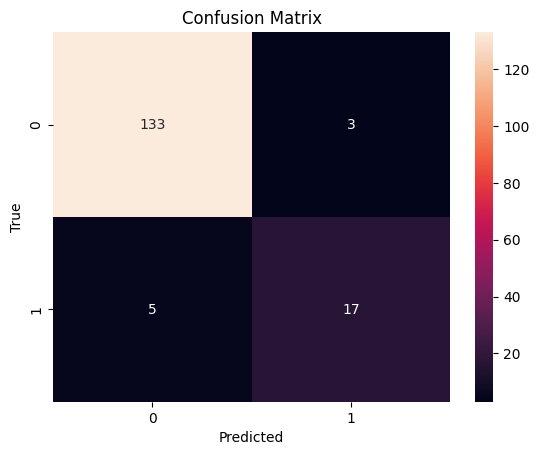

Accuracy: 0.9493670886075949
F1-score: 0.8095238095238095


In [ ]:



# Load the dataset (assuming 'recession.csv' is in the current working directory or provide the correct path)
df = pd.read_csv('recession.csv')

# ... (Your existing data preprocessing and feature engineering code) ...
# Assuming 'features' and 'df' are already defined from previous code blocks

# Ensure all features exist before proceeding
features = [
    'Unemployment_Rate', 'Unemployment_Rate_Lag1',
    'CPI_3mo_pct_chg_annualized', 'CPI_3mo_pct_chg_Lag1',
    '3M_10Y_Treasury_Spread', 'Payrolls_3mo_pct_chg_annualized'
]
missing_features = [f for f in features if f not in df.columns]

if missing_features:
  print(f"Warning: Features {missing_features} not found in the DataFrame. Removing them.")
  features = [f for f in features if f in df.columns]

# Define features (X) and target variable (y)
X = df[features]
y = df['Recession']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1}")

In [ ]:


# Function to predict recession probability
def predict_recession(model, features_data):
    """Predicts the probability of a recession based on input features.

    Args:
        model: The trained machine learning model.
        features_data: A pandas DataFrame or a NumPy array containing the features
                       for which to predict the recession probability.

    Returns:
        A NumPy array of predicted recession probabilities.
    """

    # Make sure the features in features_data match the model's expected features.
    # Check if the features are present in the input data
    missing_features = [col for col in model.feature_names_in_ if col not in features_data.columns]
    if missing_features:
        print(f"Warning: The model requires the following features not present in the input data: {missing_features}")
        # Handle the missing features, e.g., fill with zeros or a mean value
        for col in missing_features:
          features_data[col] = 0 # Example: Replace missing features with 0. Adjust as needed.

    # Convert features to numpy array
    features = features_data[model.feature_names_in_].values

    # Predict probabilities
    probabilities = model.predict_proba(features)

    # Return the probability of recession (class 1)
    return probabilities[:, 1]

# Example usage:
# Assuming you have new data in a DataFrame called 'new_data'
#  with the same columns as the original DataFrame 'df' that used to train the model
# new_data = pd.DataFrame({'Unemployment_Rate': [0.05], 'Unemployment_Rate_Lag1':[0.04], 'CPI_3mo_pct_chg_annualized':[0.02], 'CPI_3mo_pct_chg_Lag1':[0.01], '3M_10Y_Treasury_Spread':[0.1], 'Payrolls_3mo_pct_chg_annualized':[0.03]})

# Assuming the trained model is stored in the variable 'model'
# recession_probability = predict_recession(model, new_data)

# print(f"Predicted Recession Probability: {recession_probability}")



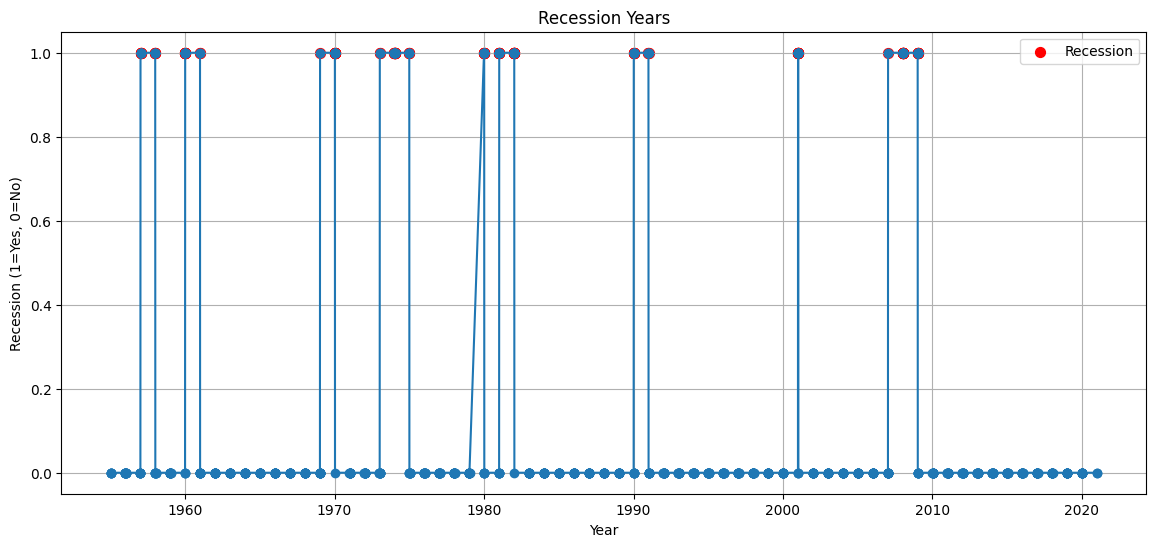

In [ ]:
'''

# Assuming 'df' is your DataFrame and contains a 'Dates' column and 'Recession' column.

# Convert 'Dates' column to datetime objects
df['Dates'] = pd.to_datetime(df['Dates'])

# Set 'Dates' as the index
df = df.set_index('Dates')

# Plot recession years
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Recession'], marker='o', linestyle='-')  # Plot recession years

# Highlight recession years
recession_years = df[df['Recession'] == 1].index
plt.scatter(recession_years, df.loc[recession_years, 'Recession'], color='red', label='Recession', s=50)

plt.xlabel("Year")
plt.ylabel("Recession (1=Yes, 0=No)")
plt.title("Recession Years")
plt.legend()
plt.grid(True)
plt.show()

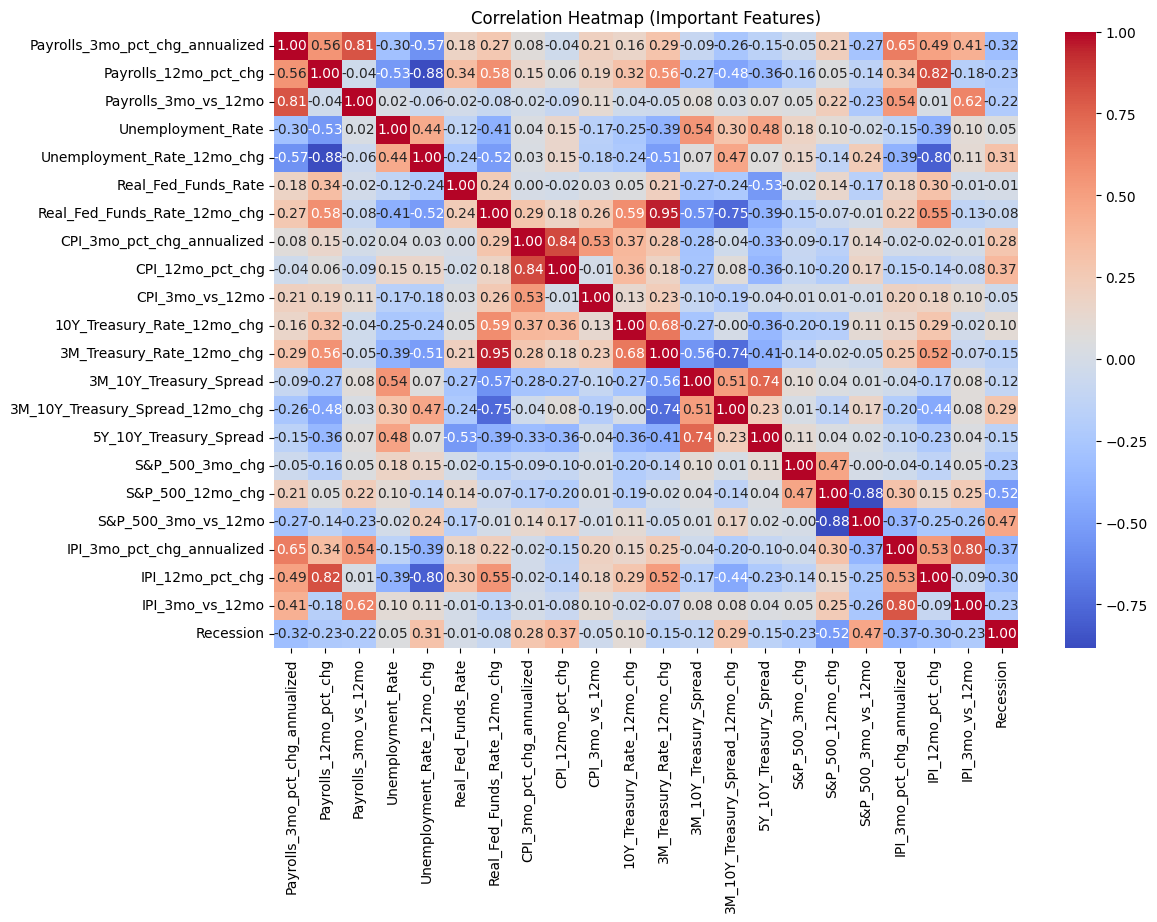

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already defined and loaded with data:

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Instead of important_correlation_matrix, use correlation_matrix or
# Filter correlation_matrix to include only the important features and assign it to important_correlation_matrix
# For example, if 'feature1', 'feature2' are important features:
# important_correlation_matrix = correlation_matrix[['feature1', 'feature2']].loc[['feature1', 'feature2']]

# Plot the heatmap with only the important features or the complete correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")  # Changed to correlation_matrix
plt.title("Correlation Heatmap (Important Features)")
plt.show()

 Hyperparameter Tuning
Using GridSearchCV for Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='f1', cv=5, verbose=2, n_jobs=-1)


In [ ]:
# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Evaluate the Tuned Model

In [ ]:
# Predict and evaluate on the test set
y_pred_tuned = best_model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred_tuned)
f1 = f1_score(y_test, y_pred_tuned)
print(f"Tuned Model - Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}")


Tuned Model - Accuracy: 0.95, F1 Score: 0.81


Model Comparison
Train and Compare Multiple Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss')  # Remove use_label_encoder
}

In [ ]:
# Create an imputer to replace NaN with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform it
X_train_imputed = imputer.fit_transform(X_train)


In [ ]:
# Make sure to import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss')  # Remove use_label_encoder
}

# Create an imputer to replace NaN with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Assuming X_train is already defined somewhere in your code
# Fit the imputer on your training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    if model_name == "Logistic Regression":
        # Use imputed data for Logistic Regression
        model.fit(X_train_imputed, y_train)
    else:
        # Use original data for other models
        model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[model_name] = {"Accuracy": accuracy, "F1 Score": f1}

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Visualise the model


In [ ]:
# Visualize comparison
import matplotlib.pyplot as plt

metrics_df = pd.DataFrame(results).T
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

In [ ]:
# prompt: Use elastic net regression

from sklearn.linear_model import ElasticNet

# Assuming X_train, X_test, y_train, y_test are already defined
# Initialize and train an Elastic Net model
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42) # Adjust alpha and l1_ratio
elastic_net_model.fit(X_train, y_train)

# Make predictions
y_pred_elastic_net = elastic_net_model.predict(X_test)

# Evaluate the model (example using mean squared error)
# You might need to adjust the evaluation metric depending on your problem
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_elastic_net)
print(f"Elastic Net Mean Squared Error: {mse}")

Elastic Net Mean Squared Error: 0.08209908157373584


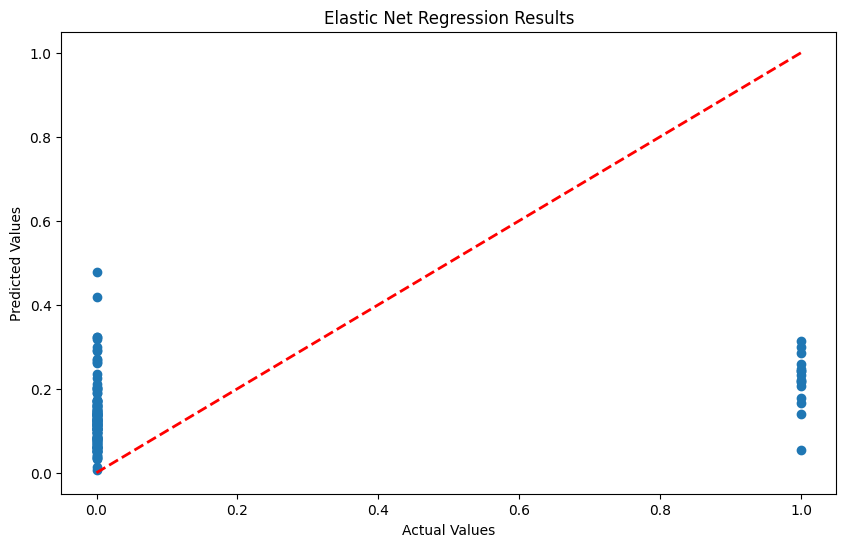

In [ ]:


import matplotlib.pyplot as plt

# Assuming y_test and y_pred_elastic_net are defined from previous code
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_elastic_net)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Elastic Net Regression Results")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2) # Add a diagonal line for reference
plt.show()

In [ ]:
# Use Lasso and ridge regression model

from sklearn.linear_model import Lasso, Ridge

# ... (Your existing code) ...

# Assuming X_train, X_test, y_train, y_test are already defined

# Lasso Regression
lasso = Lasso(alpha=0.1)  # You can tune the alpha parameter
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=0.1)  # You can tune the alpha parameter
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

# Evaluate Lasso and Ridge (example using mean squared error)
from sklearn.metrics import mean_squared_error
print("Lasso MSE:", mean_squared_error(y_test, lasso_pred))
print("Ridge MSE:", mean_squared_error(y_test, ridge_pred))

# ... (Rest of your code) ...

Lasso MSE: 0.08837895835579965
Ridge MSE: 0.053059912544821196


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       142
           1       0.88      0.88      0.88        16

    accuracy                           0.97       158
   macro avg       0.93      0.93      0.93       158
weighted avg       0.97      0.97      0.97       158



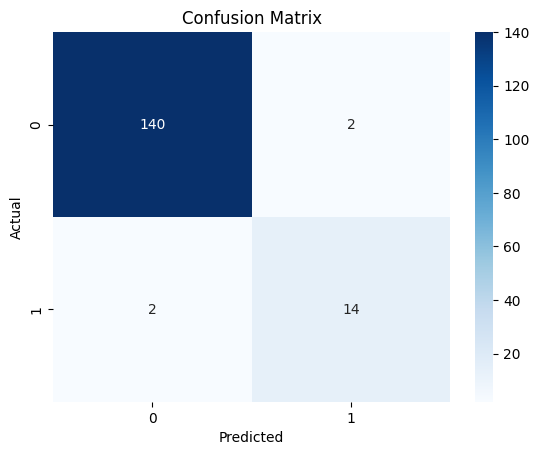

In [ ]:
#Visualise the models

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# ... (Your existing code) ...

# Assuming y_test and y_pred are already defined from your model prediction

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:

# Hyperparameter Tuning for Lasso and Ridge
from sklearn.model_selection import GridSearchCV

# Lasso Regression
lasso = Lasso(random_state=42)
lasso_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso_grid_search = GridSearchCV(lasso, lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)
best_lasso = lasso_grid_search.best_estimator_
lasso_pred = best_lasso.predict(X_test)
print("Best Lasso alpha:", lasso_grid_search.best_params_)
print("Lasso MSE:", mean_squared_error(y_test, lasso_pred))


# Ridge Regression
ridge = Ridge(random_state=42)
ridge_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
ridge_grid_search = GridSearchCV(ridge, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)
best_ridge = ridge_grid_search.best_estimator_
ridge_pred = best_ridge.predict(X_test)
print("Best Ridge alpha:", ridge_grid_search.best_params_)
print("Ridge MSE:", mean_squared_error(y_test, ridge_pred))

Best Lasso alpha: {'alpha': 0.001}
Lasso MSE: 0.05620175766291569
Best Ridge alpha: {'alpha': 0.001}
Ridge MSE: 0.05177876338816277


In [ ]:


# Hyperparameter Tuning for Lasso and Ridge

# Lasso Regression
lasso = Lasso(random_state=42)
lasso_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso_grid_search = GridSearchCV(lasso, lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)
best_lasso = lasso_grid_search.best_estimator_
lasso_pred = best_lasso.predict(X_test)
print("Best Lasso alpha:", lasso_grid_search.best_params_)
print("Lasso MSE:", mean_squared_error(y_test, lasso_pred))


# Ridge Regression
ridge = Ridge(random_state=42)
ridge_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
ridge_grid_search = GridSearchCV(ridge, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)
best_ridge = ridge_grid_search.best_estimator_
ridge_pred = best_ridge.predict(X_test)
print("Best Ridge alpha:", ridge_grid_search.best_params_)
print("Ridge MSE:", mean_squared_error(y_test, ridge_pred))

# ... (Rest of your code) ...

Best Lasso alpha: {'alpha': 0.001}
Lasso MSE: 0.05620175766291569
Best Ridge alpha: {'alpha': 0.001}
Ridge MSE: 0.05177876338816277


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Create and train the Ridge model with the best alpha
ridge_model = Ridge(alpha=0.001)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Calculate and print the MSE
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge MSE: {mse_ridge:.4f}")

Ridge MSE: 0.0518


Time Series Analysis
Prepare Data for Time-Series Models

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Ensure the data is sorted by date
df.sort_index(inplace=True)

# Encode the target variable (if not already binary)
le = LabelEncoder()
df['Recession'] = le.fit_transform(df['Recession'])

# Define features and target
X = df.drop(columns=['Recession'])
y = df['Recession']

Split Data into Training and Testing Based on Time

In [ ]:
# Use the first 80% of data for training and the last 20% for testing
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]


Train an XGBoost Time Series Model

In [ ]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_time_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_time_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_time = xgb_time_model.predict(X_test)

# Evaluation
print("Time-Series XGBoost Model")
print("Accuracy:", accuracy_score(y_test, y_pred_time))
print("F1 Score:", f1_score(y_test, y_pred_time))


Train Additional Models

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

# Create an imputer to fill NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both train and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train a KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate KNN
y_pred_knn = knn.predict(X_test)
print("KNN Model - Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Model - F1 Score:", f1_score(y_test, y_pred_knn))

KNN Model - Accuracy: 0.8417721518987342
KNN Model - F1 Score: 0.13793103448275862


Create an Ensemble Model
Voting Classifier (Simple Ensemble)
Combine multiple models using Voting Classifier:

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC # Import SVC from sklearn.svm

# Initialize models
voting_clf = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('svm', SVC(probability=True, random_state=42)),
        ('knn', KNeighborsClassifier(n_neighbors=5)),
        ('dt', DecisionTreeClassifier(random_state=42))
    ],
    voting='soft'  # 'soft' for probabilities, 'hard' for majority voting
)

In [ ]:

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Evaluate the ensemble model
y_pred_voting = voting_clf.predict(X_test)
print("Voting Classifier - Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Voting Classifier - F1 Score:", f1_score(y_test, y_pred_voting))

Voting Classifier - Accuracy: 0.8924050632911392
Voting Classifier - F1 Score: 0.5142857142857142


Stacking Ensemble (Advanced Ensemble)
Stack predictions of multiple models and use a meta-model:

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base models and meta-model
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('svm', SVC(probability=True, random_state=42)),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

In [ ]:

# Train the stacking ensemble
stacking_clf.fit(X_train, y_train)

# Evaluate the stacking model
y_pred_stacking = stacking_clf.predict(X_test)
print("Stacking Classifier - Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("Stacking Classifier - F1 Score:", f1_score(y_test, y_pred_stacking))


Stacking Classifier - Accuracy: 0.930379746835443
Stacking Classifier - F1 Score: 0.717948717948718


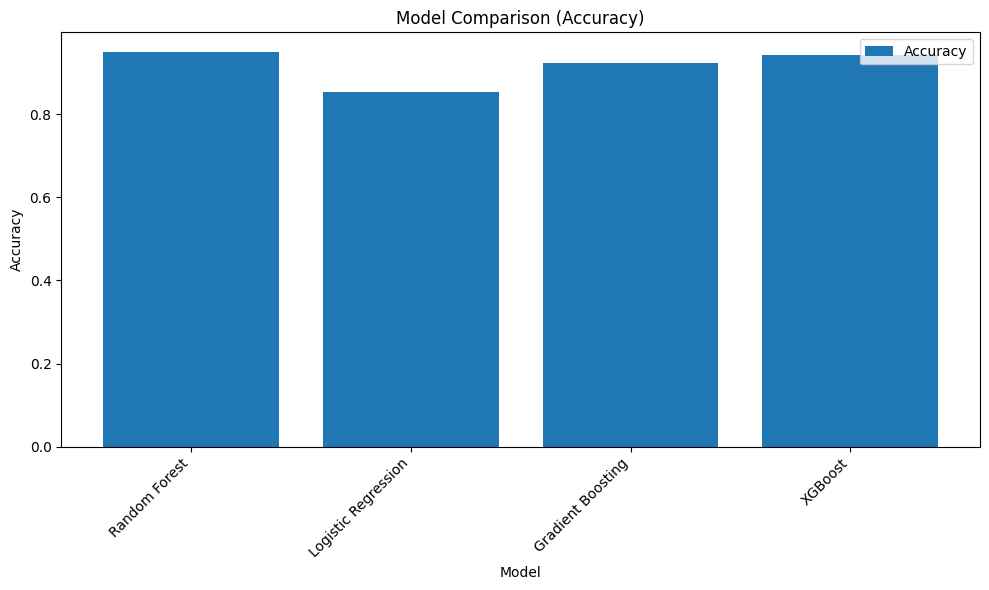

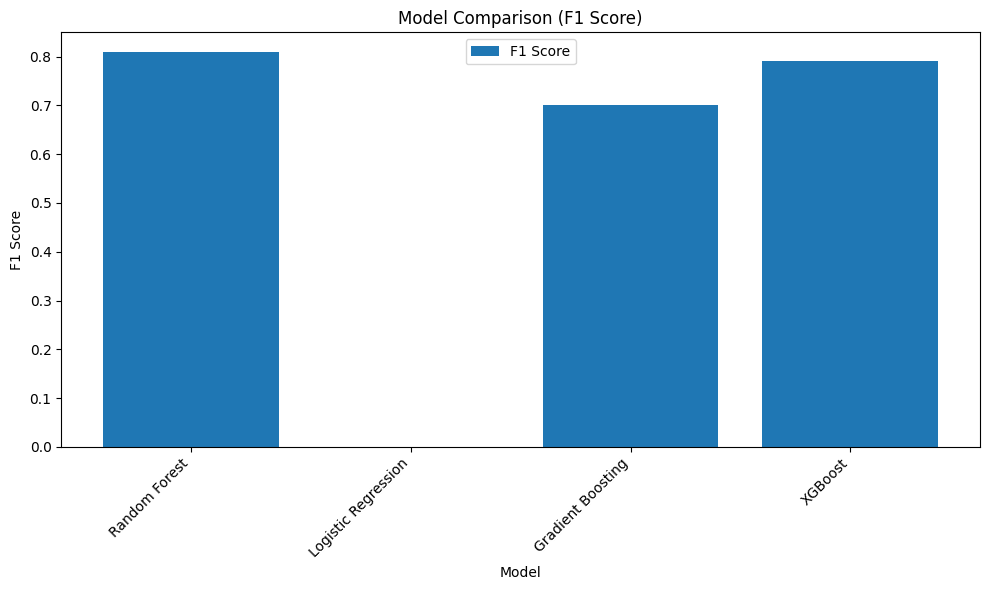

3. Model Comparison
Visualize the performance of all models, including the ensemble:

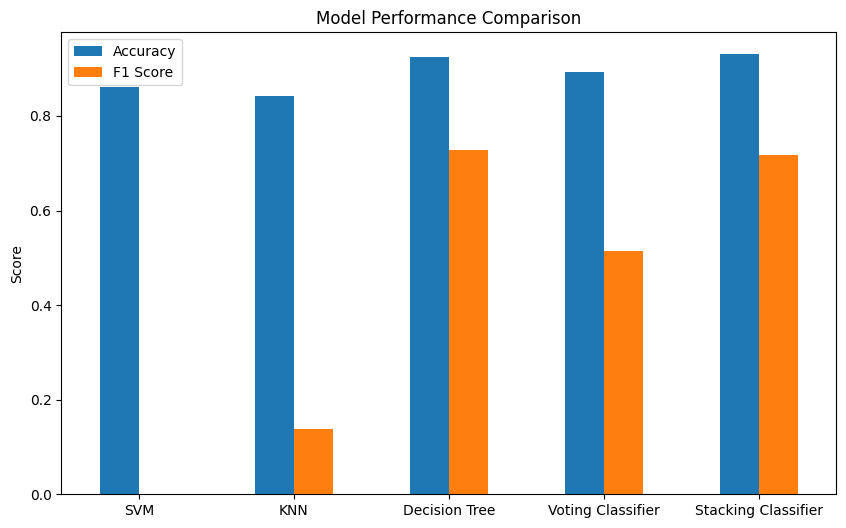

In [ ]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC # Import SVC
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier


# Assuming you have X_test defined, predict using the SVM model
svm_model = SVC(probability=True, random_state=42) # Create an instance of SVC
svm_model.fit(X_train, y_train) # Train the model
y_pred_svm = svm_model.predict(X_test) # Get predictions

# Create and train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)  # Create an instance of DecisionTreeClassifier
dt_model.fit(X_train, y_train)  # Train the model
y_pred_dt = dt_model.predict(X_test)  # Get predictions

# Collect results
ensemble_results = {
    "SVM": {"Accuracy": accuracy_score(y_test, y_pred_svm), "F1 Score": f1_score(y_test, y_pred_svm)},
    "KNN": {"Accuracy": accuracy_score(y_test, y_pred_knn), "F1 Score": f1_score(y_test, y_pred_knn)},
    "Decision Tree": {"Accuracy": accuracy_score(y_test, y_pred_dt), "F1 Score": f1_score(y_test, y_pred_dt)},
    "Voting Classifier": {"Accuracy": accuracy_score(y_test, y_pred_voting), "F1 Score": f1_score(y_test, y_pred_voting)},
    "Stacking Classifier": {"Accuracy": accuracy_score(y_test, y_pred_stacking), "F1 Score": f1_score(y_test, y_pred_stacking)},
}

# ... (Rest of your code for visualization) ...
# Convert to DataFrame for visualization
results_df = pd.DataFrame(ensemble_results).T
results_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

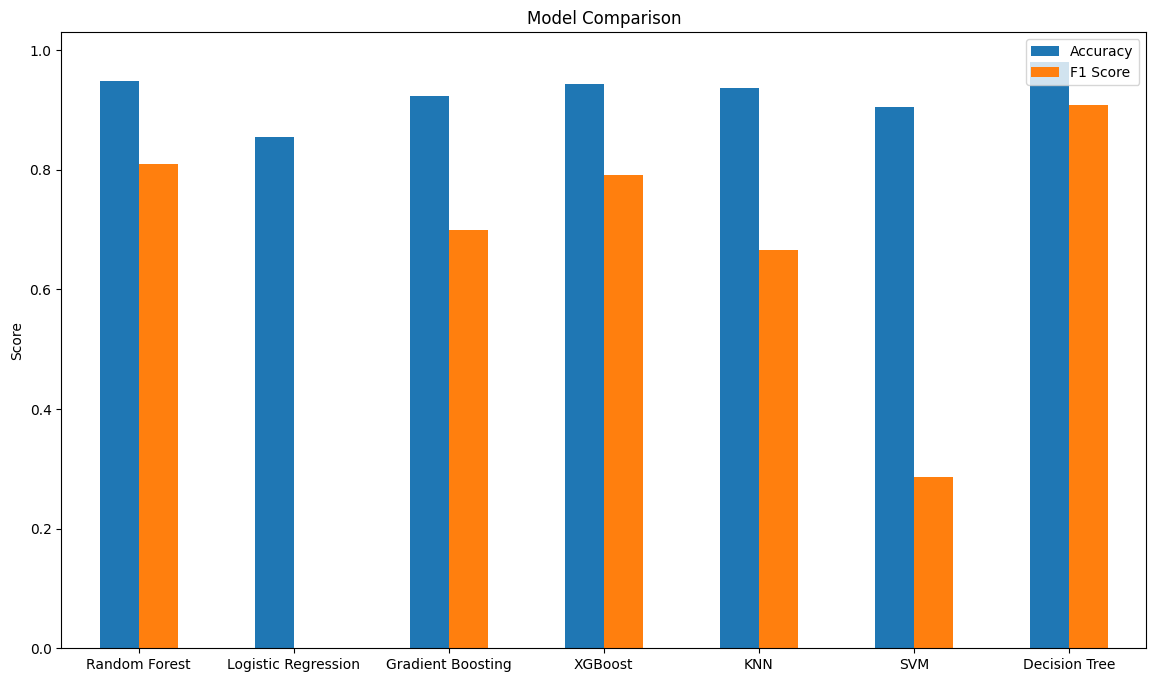

In [ ]:
# Add two more models and create a visualisation

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
# ... (Your existing code) ...

# Train Additional Models (KNN, SVM, Decision Tree)

# Assuming X_train, X_test, y_train, y_test, and the imputer are already defined

# Train a KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


# Train an SVM model
svm = SVC(probability=True, random_state=42) #probability=True for soft voting
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)


# Train a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluate the new models and add to the results dictionary

results["KNN"] = {"Accuracy": accuracy_score(y_test, y_pred_knn), "F1 Score": f1_score(y_test, y_pred_knn)}
results["SVM"] = {"Accuracy": accuracy_score(y_test, y_pred_svm), "F1 Score": f1_score(y_test, y_pred_svm)}
results["Decision Tree"] = {"Accuracy": accuracy_score(y_test, y_pred_dt), "F1 Score": f1_score(y_test, y_pred_dt)}


# Visualize comparison
metrics_df = pd.DataFrame(results).T
metrics_df.plot(kind='bar', figsize=(14, 8))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

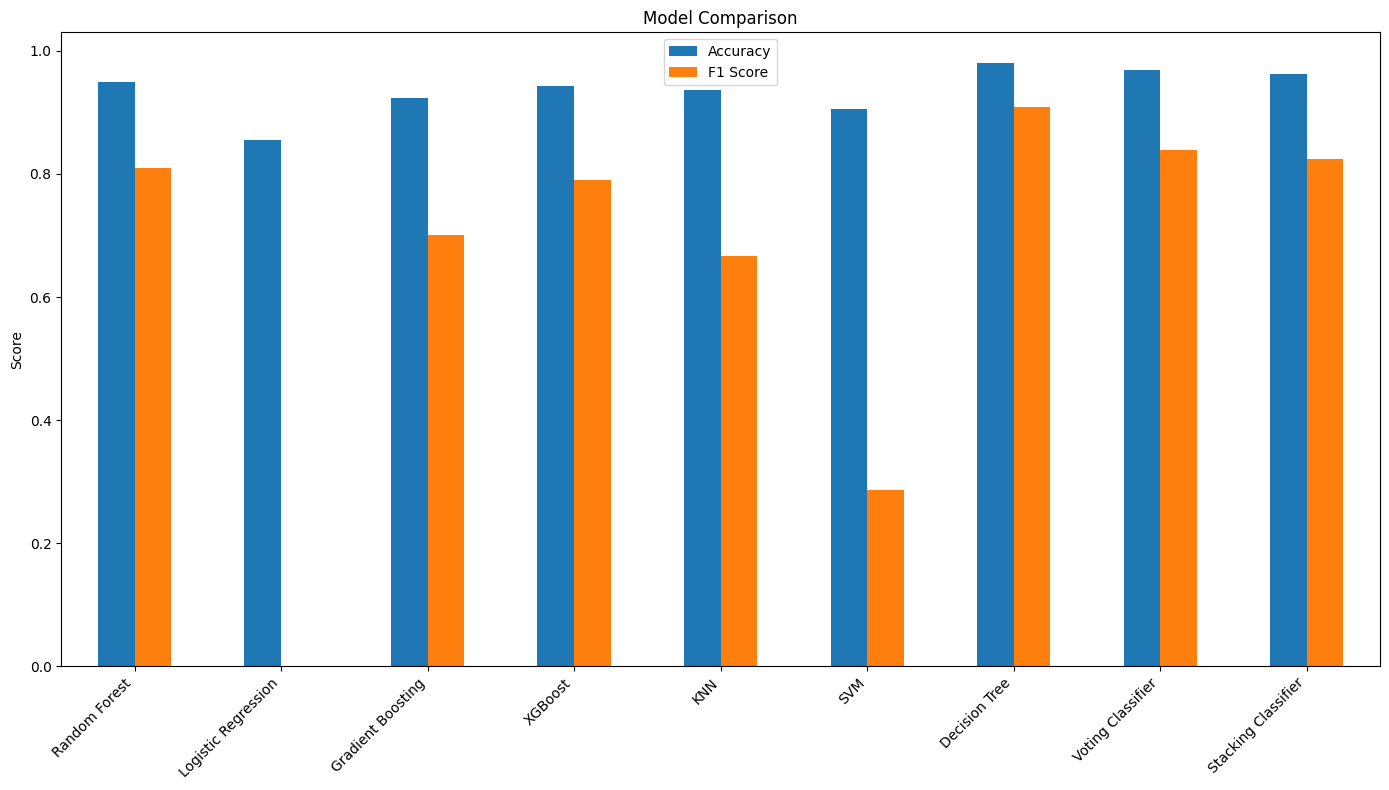

In [ ]:
# add the ensemble models

from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd


# Train Additional Models (KNN, SVM, Decision Tree) - Assuming X_train, X_test, y_train, y_test are defined

# Train a KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


# Train an SVM model
svm = SVC(probability=True, random_state=42)  # probability=True for soft voting
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)


# Train a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluate the new models and add to the results dictionary
results["KNN"] = {"Accuracy": accuracy_score(y_test, y_pred_knn), "F1 Score": f1_score(y_test, y_pred_knn)}
results["SVM"] = {"Accuracy": accuracy_score(y_test, y_pred_svm), "F1 Score": f1_score(y_test, y_pred_svm)}
results["Decision Tree"] = {"Accuracy": accuracy_score(y_test, y_pred_dt), "F1 Score": f1_score(y_test, y_pred_dt)}

# Create and train the ensemble models (Voting and Stacking)

# Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('svm', SVC(probability=True, random_state=42)),
        ('knn', KNeighborsClassifier(n_neighbors=5)),
        ('dt', DecisionTreeClassifier(random_state=42))
    ],
    voting='soft'
)
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
results["Voting Classifier"] = {"Accuracy": accuracy_score(y_test, y_pred_voting), "F1 Score": f1_score(y_test, y_pred_voting)}


# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('svm', SVC(probability=True, random_state=42)),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ],
    final_estimator=LogisticRegression(),
    cv=5
)
stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)
results["Stacking Classifier"] = {"Accuracy": accuracy_score(y_test, y_pred_stacking), "F1 Score": f1_score(y_test, y_pred_stacking)}


# Visualize comparison
metrics_df = pd.DataFrame(results).T
metrics_df.plot(kind='bar', figsize=(14, 8))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

 Feature Optimization with PCA
Principal Component Analysis (PCA) can reduce dimensionality while retaining most of the dataset's variance.

Apply PCA

In [ ]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Standardize the data
scaler = StandardScaler()
# Impute missing values using the mean before scaling
imputer = SimpleImputer(strategy='mean') # or strategy='median'
X_imputed = imputer.fit_transform(X)
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

print(f"Original features: {X.shape[1]}, Reduced features: {X_pca.shape[1]}")

Original features: 4, Reduced features: 4


Accuracy after PCA: 0.9051


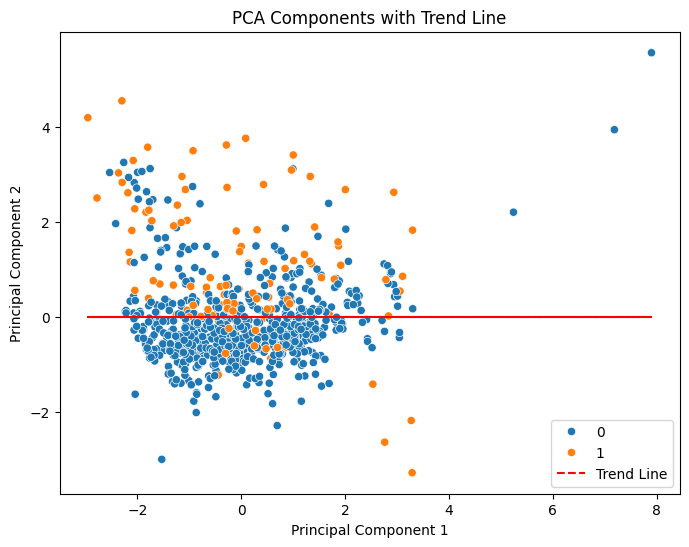

In [ ]:
# Visualise PCA with a trend line

import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Assuming X_pca and y are defined from previous code blocks

# Split data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a model on the PCA-transformed data (e.g., Logistic Regression)
pca_model = LogisticRegression()
pca_model.fit(X_train_pca, y_train)

# Make predictions
y_pred_pca = pca_model.predict(X_test_pca)

# Evaluate the model
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy after PCA: {accuracy_pca:.4f}")


# Visualize PCA components with trend line (example with first two components)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)  # Assuming 'y' is your target variable

# Calculate trend line
z = np.polyfit(X_pca[:, 0], X_pca[:, 1], 1) # linear fit
p = np.poly1d(z)

plt.plot(X_pca[:, 0], p(X_pca[:, 0]), color='red', linestyle='--', label='Trend Line')

plt.title('PCA Components with Trend Line')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Split PCA Data

In [ ]:
# Split into train and test sets
X_train_pca, X_test_pca = X_pca[:train_size], X_pca[train_size:]


Enhance Ensemble with XGBoost and Gradient Boosting Train Individual Models with PCA Features

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Train Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_pca, y_train)
y_pred_gb = gb.predict(X_test_pca)


In [ ]:

# Train XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_pca, y_train)
y_pred_xgb = xgb.predict(X_test_pca)

# Evaluate
print("Gradient Boosting - Accuracy:", accuracy_score(y_test, y_pred_gb))
print("XGBoost - Accuracy:", accuracy_score(y_test, y_pred_xgb))


Gradient Boosting - Accuracy: 0.879746835443038
XGBoost - Accuracy: 0.8291139240506329


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:39:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


3. Create an Advanced Stacking Ensemble
Combine models (including PCA-transformed ones) into a Stacking Classifier.

Build the Stacking Ensemble

In [ ]:
stacking_clf_advanced = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42)),
        ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

# Train Stacking Ensemble
stacking_clf_advanced.fit(X_train_pca, y_train)

# Evaluate the Stacking Ensemble
y_pred_stacking_advanced = stacking_clf_advanced.predict(X_test_pca)

print("Advanced Stacking Classifier - Accuracy:", accuracy_score(y_test, y_pred_stacking_advanced))
print("Advanced Stacking Classifier - F1 Score:", f1_score(y_test, y_pred_stacking_advanced))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:39:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:40:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:40:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:40:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Advanced Stacking Classifier - Accuracy: 0.8987341772151899
Advanced Stacking Classifier - F1 Score: 0.0


4. Feature Selection Using Recursive Feature Elimination (RFE)
Identify and retain the most relevant features for modeling.

Apply RFE with Random Forest

In [ ]:
from sklearn.feature_selection import RFE

# Initialize RFE
rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", list(selected_features))

# Transform the data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)


Selected Features: ['Payrolls_3mo_pct_chg_annualized', 'Payrolls_12mo_pct_chg', 'Payrolls_3mo_vs_12mo', 'Unemployment_Rate_12mo_chg', 'Real_Fed_Funds_Rate_12mo_chg', 'CPI_12mo_pct_chg', '3M_10Y_Treasury_Spread', 'S&P_500_12mo_chg', 'S&P_500_3mo_vs_12mo', 'IPI_3mo_pct_chg_annualized']


Train with Selected Features

In [ ]:
# Train Random Forest with selected features
rf_rfe = RandomForestClassifier(random_state=42)
rf_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = rf_rfe.predict(X_test_rfe)

print("RFE Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rfe))
print("RFE Random Forest - F1 Score:", f1_score(y_test, y_pred_rfe))


RFE Random Forest - Accuracy: 0.9493670886075949
RFE Random Forest - F1 Score: 0.8095238095238095
